# Apprenez à représenter et afficher des images en langage Python

cour ocr : https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/4470538-comprenez-comment-un-ordinateur-voit-une-image

## Comprenez comment un ordinateur voit une image

**Caractéristique d'une image numérique**

Une image numérique est caractérisée par sa définition et sa résolution.  

La définition correspond à la donnée `hauteur × largeur` exprimée en pixels. 

La résolution désigne le nombre de pixels par unité de longueur de l'image analogique. Elle permet de mesurer la qualité de l'image obtenue après numérisation : plus la résolution est élevée, meilleure est la qualité de l'image. 


**NB**:
Le nombre de mégapixels (1 mégapixel = 1 million de pixels) mis en avant par les fabricants d'appareils photos exprime la définition, et non la résolution. Par exemple, une définition de 6000 ×
 4000 équivaut à 24 mégapixels

In [18]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


En effet, l’image chargée par la fonction  imread  fait 512 lignes sur 512 colonnes, avec chaque pixel stocké sur 3 octets (car c’est une image couleur, en triplets RVB). Ensuite s’affiche la valeur du pixel de la ligne 0 colonne 0 qui est le triplet [125 137 226].

In [19]:
# téléchargement simba

!wget https://user.oc-static.com/upload/2018/02/07/15180252235774_simba.png

--2024-03-09 23:25:07--  https://user.oc-static.com/upload/2018/02/07/15180252235774_simba.png
Résolution de user.oc-static.com (user.oc-static.com)… 2606:4700::6812:11bc, 2606:4700::6812:10bc, 104.18.16.188, ...
Connexion à user.oc-static.com (user.oc-static.com)|2606:4700::6812:11bc|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 39588 (39K) [image/png]
Sauvegarde en : « 15180252235774_simba.png »

15180252235774_simb 100%[===================>]  38,66K  --.-KB/s    ds 0,004s  

2024-03-09 23:25:07 (9,30 MB/s) — « 15180252235774_simba.png » sauvegardé [39588/39588]



In [23]:
!mv 15180252235774_simba.png simba.png

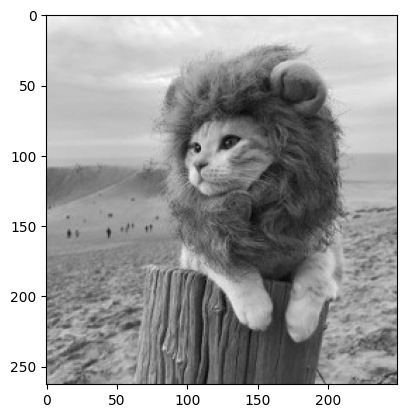

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

matrice = cv.imread("simba.png")  # charge le fichier dans une matrice de pixels couleur
plt.imshow(matrice[..., ::-1])   # affiche la matrice de triplets RVB
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

### Formats de fichiers
Il existe plusieurs formats de fichiers pour stocker une image, comme les formats **JPEG**, **PNG** et **TIFF. La différence se fait au niveau de la compression de l'image : la suite de bits représentant l'image numérique est transformée dans le fichier en une suite de bits plus courte, exprimant exactement les mêmes informations (compression sans perte de données, comme PNG et TIFF) ou des informations proches (compression avec pertes, comme JPEG).  

In [28]:
#  PIL - (Python Imaging Library) crée à partir de Pillow
# doc pillow : https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes
# taille image

from PIL import Image

# Charger l'image
img = Image.open("simba.png") 
#img.show()

# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 250 px, hauteur : 263 px


Ce résultat signifie que l'image analogique a été découpée en 250 pixels sur la largeur et 263 pixels sur la hauteur pendant l'échantillonnage.

Maintenant, inspectons les valeurs de pixels. L'attribut  Image.mode  nous informe sur le format de pixel utilisé, autrement dit sur la façon dont la quantification a été faite. De plus, la méthode Image.getpixel permet de récupérer l'intensité associée au pixel à une position donnée

In [29]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 196


Nous pouvons également récupérer d'un seul coup les valeurs de tous les pixels de l'image à l'aide de la bibliothèque numpy :

In [33]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}\n".format(mat.shape))
mat

Taille de la matrice de pixels : (263, 250)



array([[247, 245, 245, ..., 224, 228, 228],
       [246, 244, 243, ..., 228, 230, 230],
       [244, 242, 240, ..., 230, 231, 231],
       ...,
       [183, 169, 169, ..., 108,  95, 102],
       [170, 160, 171, ...,  81,  95,  99],
       [150, 155, 174, ..., 133, 115, 111]], dtype=uint8)

On retrouve bien la représentation introduite dans la section précédente pour une image numérique en noir et blanc : nous avons une matrice de taille hauteur ×
 largeur où chaque élément contient un entier compris entre 0 et 255 afin d'indiquer le niveau de gris du pixel associé. 

## Appliquez vos premiers traitements d'image

L'histogramme d'une image numérique est une courbe statistique représentant la répartition de ses pixels selon leur intensité. Pour une image en noir et blanc, il indique en abscisse le niveau de gris (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette valeur.

Lorsque l'histogramme est normalisé, il indique en ordonnée la probabilité pi
 de trouver un pixel de niveau de gris i
 dans l'image 

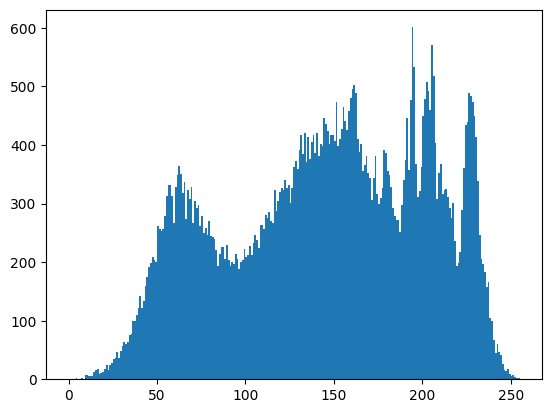

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Charger l'image comme matrice de pixels
img = np.array(Image.open('simba.png'))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

In [36]:
# Charger l'image sous forme d'une matrice de pixels
img = np.array(Image.open('simba.png'))

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, img.shape)

# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(img + noise).convert('L')
#noisy_img.show()

## Filtrez une image

#### Les filtres linéaires

Il existe différentes techniques de filtrage selon le type de bruit à atténuer. Le lissage par moyennage utilise un filtre linéaire et fait partie, en ce sens, de la classe de filtrage la plus simple.

#### L'opérateur de convolution

Un filtre linéaire remplace la valeur de chaque pixel en entrée par une combinaison linéaire des intensités de ses pixels voisins. L'opérateur permettant d’effectuer cette transformation est appelé produit de convolution. C'est pourquoi l'application d'un filtre linéaire est également connue sous le terme de filtrage par convolution. 

Les éléments de H
 ont été indexés de −k
 à k
 afin de pouvoir visualiser facilement l'opération : le filtrage par convolution revient à balayer l'image par une fenêtre d'analyse de taille finie, centrée en le pixel à modifier.

## Découvrez la notion de "features" dans une image

In [2]:
import cv2 as cv

matrice = cv.imread("Lenna.png")   # charge le fichier dans une matrice de pixels couleur
print(matrice.shape)              # affiche les dimensions de la matrice
print(matrice[0,0])               # accède à la valeur du premier pixel

(440, 440, 3)
[124 137 226]


In [3]:
matrice

array([[[124, 137, 226],
        [127, 137, 225],
        [132, 136, 222],
        ...,
        [123, 150, 233],
        [114, 136, 224],
        [ 92, 102, 202]],

       [[124, 137, 226],
        [127, 137, 225],
        [132, 136, 222],
        ...,
        [123, 150, 233],
        [114, 136, 224],
        [ 92, 102, 202]],

       [[124, 137, 226],
        [127, 137, 225],
        [132, 136, 222],
        ...,
        [122, 149, 232],
        [113, 134, 223],
        [ 92, 101, 201]],

       ...,

       [[ 60,  18,  84],
        [ 58,  21,  86],
        [ 58,  25,  93],
        ...,
        [ 84,  72, 174],
        [ 78,  70, 169],
        [ 80,  62, 172]],

       [[ 58,  20,  82],
        [ 59,  24,  86],
        [ 60,  29,  95],
        ...,
        [ 78,  68, 177],
        [ 80,  71, 178],
        [ 80,  70, 183]],

       [[ 56,  22,  81],
        [ 58,  25,  86],
        [ 62,  31,  96],
        ...,
        [ 76,  67, 178],
        [ 81,  71, 181],
        [ 81,  74, 185]]

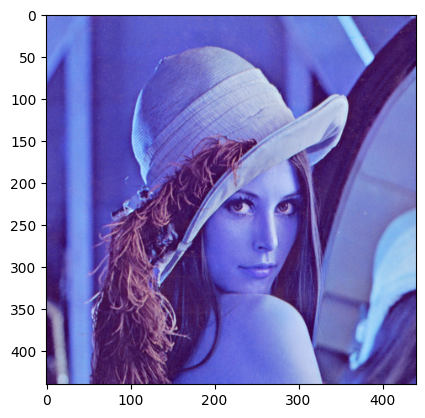

In [4]:
import matplotlib.pyplot as plt 

#plt.imshow(matrice)
plt.imshow(matrice, cmap="gray")

OpenCV gère les valeurs des pixels non pas dans l’ordre RVB, mais à l’inverse dans l’ordre BVR, donc 226 est ici la composante de rouge du pixel de coordonnées (0,0).

Pour convertir l’image couleur précédente en matrice de pixels en niveaux de gris, on peut ajouter les instructions suivantes :

(440, 440)
162


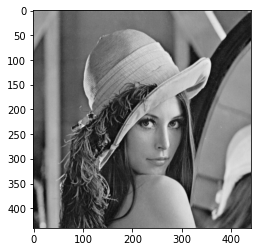

In [19]:
# conversion des triplets BVR en gris

matG = cv.cvtColor(matrice, cv.COLOR_BGR2GRAY) 
#matG = cv.cvtColor(matrice, cv.IMREAD_GRAYSCALE) 
print(matG.shape)
print(matG[0,0])

#plt.imshow(matG)
plt.imshow(matG, cmap="gray")

Il existe un paramètre de la fonction  imread  qui permet de charger une image directement dans une matrice de niveaux de gris : la valeur 0 ajoutable en second paramètre équivalent à  cv.IMREAD_GRAYSCALE. Cependant cette fonction n’utilise pas exactement la même formule de conversion en luminance.

In [13]:
# charge le fichier dans une matrice de pixels gris

matG_0 = cv.imread("Lenna.png", 0)  
matG_0

array([[169, 168, 167, ..., 178, 167, 141],
       [169, 168, 167, ..., 178, 167, 141],
       [169, 168, 167, ..., 176, 165, 140],
       ...,
       [ 53,  56,  61, ..., 116, 112, 111],
       [ 53,  56,  61, ..., 115, 117, 119],
       [ 53,  56,  61, ..., 115, 118, 122]], dtype=uint8)

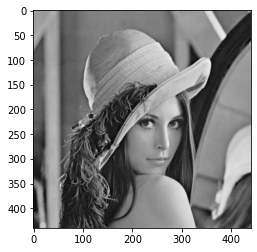

In [15]:
#plt.imshow(matG_0)
plt.imshow(matG_0, cmap="gray")

Cet appel de fonction  imwrite  enregistre un fichier contenant la matrice de pixels, selon le type de matrice (niveaux de gris, ou couleurs) et selon le format indiqué par le nom choisi (ici PNG, mais on pourrait aussi choisir JPEG en terminant le nom du fichier par .jpg).

In [7]:
# enregistre la matrice dans un fichier du nom indiqué

cv.imwrite("resultat.jpg", matG)  

True

### Visualisez une matrice de pixels

In [ ]:

cv.imshow("Image de matG", matG) # fenêtre visualisant la matrice et le titre indiqué
cv.waitKey(0)                    # attend l’appui sur une touche du clavier
cv.destroyAllWindows()           # efface toutes les fenêtres ouvertes par imshow

Cet affichage permis par la bibliothèque OpenCV est très sommaire.

Mais il existe dans la bibliothèque Matplotlib une autre fonction d’affichage plus évoluée :
- Elle dispose d’une loupe si on veut analyser des détails ;
- Elle attend qu’on ait cliqué sur la fermeture de la fenêtre de visualisation d’image pour continuer la suite du programme.

#### Exemple 1 :

Ajoutons une ligne verticale blanche (en colonne 100) sur une image :

Comme la bibliothèque Matplotlib considère les images couleur en triplets RVB et qu’au contraire la bibliothèque OpenCV les gère en ordre inverse, en triplets BVR, il faut inverser l’ordre de tous les triplets, ce que fait l’indexation utilisant  ::-1  .

In [5]:
!ls

ImageProcessing
Initiez-vous au traitement_de_bases_des_images_OCR.ipynb
Lenna.png
amazon_2000.png
amazon_2012.png
cache.png
corrige
evaluer-la-deforestation-en-amazonie_exemple-2018-11-15T134349.zip
images
message.png
principe-filtrage-frequentiel.png
resultat.jpg
running.jpg
smiley_nb.png
thomas.png
ville.png


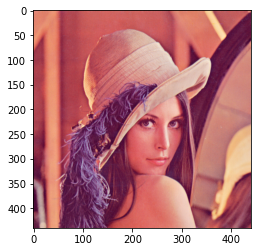

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

matrice = cv.imread("Lenna.png")  # charge le fichier dans une matrice de pixels couleur
plt.imshow(matrice[..., ::-1])   # affiche la matrice de triplets RVB
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

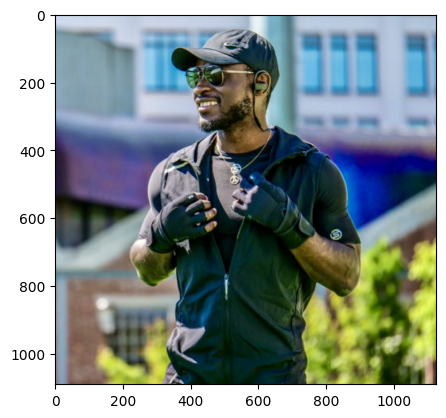

In [7]:
matrice = cv.imread("thomas.png")  # charge le fichier dans une matrice de pixels couleur
plt.imshow(matrice[..., ::-1])   # affiche la matrice de triplets RVB
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur


On aurait pu obtenir le même résultat en utilisant la fonction de conversion :

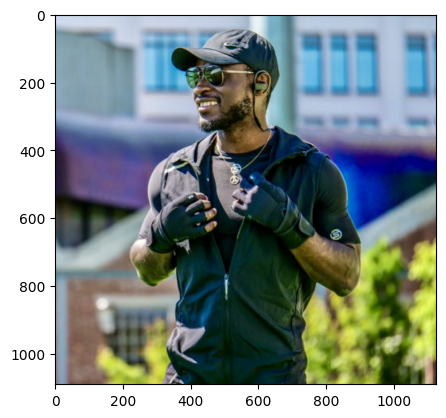

In [8]:
plt.imshow(cv.cvtColor(matrice, cv.COLOR_BGR2RGB)) # affiche la matrice de triplets RVB

Quand la matrice n’est pas en couleurs mais en niveaux de gris, il faut préciser d’utiliser une palette (colormap) de gris :

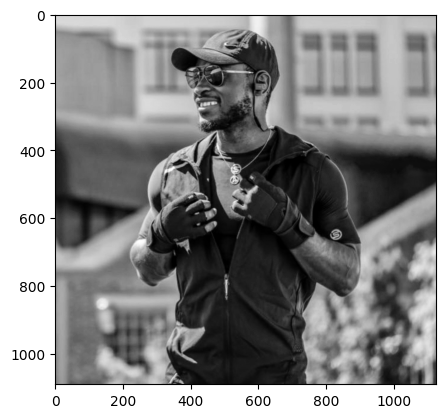

In [9]:
matG = cv.imread("thomas.png", 0)  # charge le fichier dans une matrice de pixels gris
plt.imshow(matG, cmap = 'gray')  # affiche la matrice de niveaux de gris
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

### Modifiez une matrice de pixels

#### Exemple 1

Ajoutons une ligne verticale blanche (en colonne 100) sur une image :

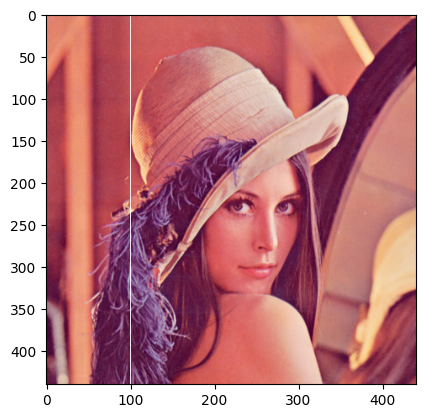

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("Lenna.png") # charge le fichier dans une matrice de pixels couleur


#  image[i,j]  permet donc d’accéder à la valeur du pixel aux coordonnées (i,j) 

for i in range(0,image.shape[0]): # pour toutes les lignes i de l’image
    image[i,100] = [255, 255, 255] # insère du blanc en ligne i colonne 100

plt.imshow(image[..., ::-1])
plt.show()

La syntaxe d'indexation  image[i,j]  de Python permet beaucoup plus qu'accéder à un simple pixel : elle permet en fait d'extraire une sous-partie de la matrice de pixels et son utilisation pour accéder à un seul pixel, ce qui peut être un usage peu optimal. C'est pourquoi il existe des opérations spécialisées pour accéder à un seul pixel :

- En lecture :  image.item(i,j)  fournit la valeur du pixel en (i,j) ;
- En écriture :  image.itemset((i,j),valeur)  permet d'affecter la valeur souhaitée au pixel (i,j).

Cependant, nous n'utiliserons pas cette syntaxe spécialisée dans la suite de nos exemples pour conserver une lecture aisée et légère des programmes.

#### Exemple 2 :

Modifions les composantes couleurs d’une image : le quart supérieur gauche du haut effacera la première composante de chaque triplet, le quart supérieur droit du haut effacera la deuxième composante de chaque triplet, le quart inférieur gauche du bas effacera la troisième composante, et le quart inférieur droit de l’image restera intact tel quel.

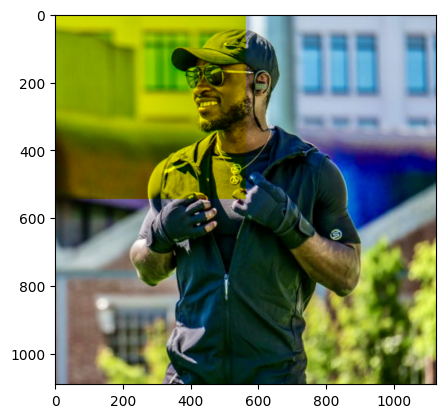

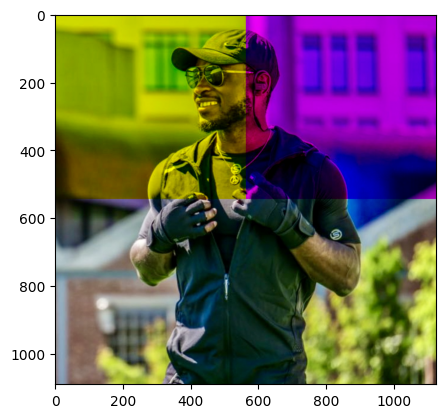

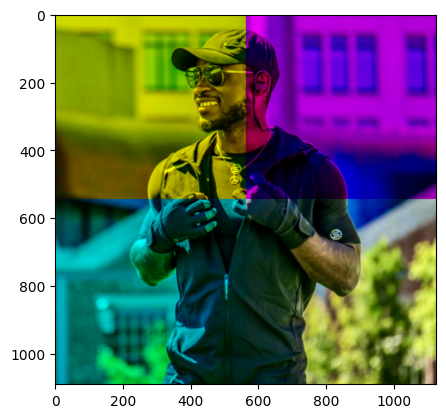

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("thomas.png") # charge le fichier dans une matrice de pixels couleur



for i in range(0, image.shape[0]//2): # // est la division entire par 2
    for j in range(0, image.shape[1]//2):
        image[i,j,0] = 0 # efface la 1re composante, bleue, du triplet BVR
#plt.subplot(3, 1, 1)
plt.imshow(image[..., ::-1])
plt.show()

for i in range(0, image.shape[0]//2):
    for j in range(image.shape[1]//2, image.shape[1]):
        image[i,j,1] = 0 # efface la 2e composant, verte, du triplet BVR

#plt.subplot(3, 2, 2)
plt.imshow(image[..., ::-1])
plt.show()

for i in range(image.shape[0]//2, image.shape[0]):
    for j in range(0, image.shape[1]//2):
        image[i,j,2] = 0 # efface la 3e composante, rouge, du triplet BVR
#plt.subplot(3, 3, 3)
plt.imshow(image[..., ::-1])
plt.show()

On constate sur le résultat que les couleurs de la photo originale de Lena contenaient essentiellement des mélanges de rouge et de vert (et très peu de bleu) car :

- La suppression de la composante bleue ne change pas beaucoup les couleurs ;
- La suppression du vert fait apparaître une dominante de rouge ;
- La suppression du rouge faire apparaître une dominante de vert.

 image[i,j, 0]  permet donc d’accéder à la composante d’indice 0 de la valeur du pixel aux coordonnées (i,j)  → c’est la composante bleue, et donc 1 pour le vert et 2 pour le rouge.

#### Exemple 3 : Passons d’une photo noir et blanc à son négatif.

Cette opération, dite d’inverse vidéo, renverse l’ordre des niveaux de gris de l’image (le noir devient blanc, le blanc devient noir, etc.).

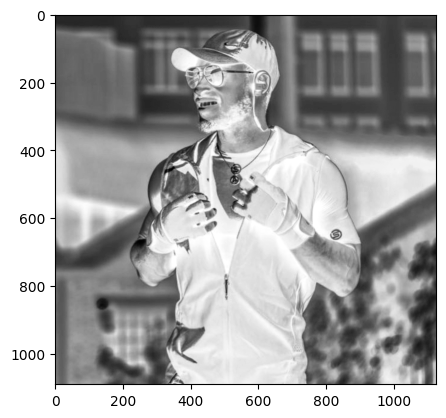

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("thomas.png", 0) # charge le fichier dans une matrice de pixels gris

image = 255 - image
plt.imshow(image, cmap = 'gray')
plt.show()

Plutôt que de répéter l’opération  image[i,j] = 255 - image[i,j]  en chaque pixel, on a utilisé ici les opérations matricielles pour faire globalement cette opération en une seule instruction, de manière plus concise et plus efficace.

# Maîtrisez la construction d’histogrammes et réalisez des modifications simples

#### Convertissez une image couleur en noir & blanc (niveaux de gris)

Pour écrire un algorithme qui convertit une image couleur en niveaux de gris, exploitez la formule de luminance Y utilisée en télévision pour (cf. YUV, YIQ et YDbDr vu antérieurement) : `Y = 0,299.R + 0,587.V + 0,114.B`

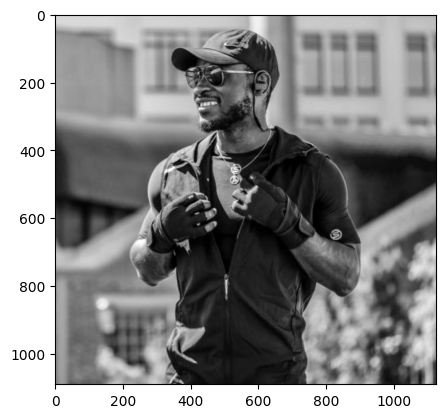

In [14]:
import cv2 as cv
import numpy as np

image = cv.imread("thomas.png")
b,v,r = cv.split(image)         # récupère 3 matrices d'octets séparées pour R et V et B
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets

#cv.imshow("Luminance Y", y)
#cv.waitKey(0)
#cv.destroyAllWindows()

#plt.imshow(y[..., ::-1])   # affiche la matrice de triplets RVB
plt.imshow(y, cmap='gray')
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

On a utilisé des opérations matricielles (de multiplication et d’addition) pour éviter d’écrire deux boucles imbriquées répétant ce calcul sur chacun des pixels  y[i,j], en fonction de  `r[i,j],  v[i,j]  et  b[i,j]`.

On a utilisé la fonction  split  pour « découper » l’image couleur en 3 tranches séparées pour chaque composante (celles de rouge, vert et bleu). Dans le cas d’une répétition en chaque pixel comme évoqué ci-dessus, nous aurions pu éviter ce  split  et réécrire  `b[i,j]   v[i,j]  et  r[i,j]`  en utilisant directement  `image[i,j,0],  image[i,j,1]  et  image[i,j,3]`  respectivement pour accéder à chacune des 3 composantes du triplet dans l’image.

Une telle fonction de conversion existe évidemment déjà dans la bibliothèque OpenCV de traitement d’images  :  `y = cv.cvtColor(image, cv.COLOR_BGR2GRAY)`  qui considère les triplets des pixels en ordre `B-V-R`.

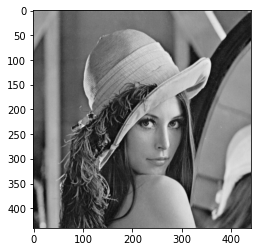

In [28]:
y = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
plt.imshow(y, cmap='gray')

In [ ]:
matrice = cv.imread("Lenna.png")  # charge le fichier dans une matrice de pixels couleur


#### Calculez des histogrammes d’images

L’histogramme d’une image est le graphique qui représente le nombre de pixels existant pour chaque valeur. Calculer l’histogramme de l’image en niveaux de gris, c’est en d’autres termes compter combien il y a de pixels pour chaque nuance de gris.

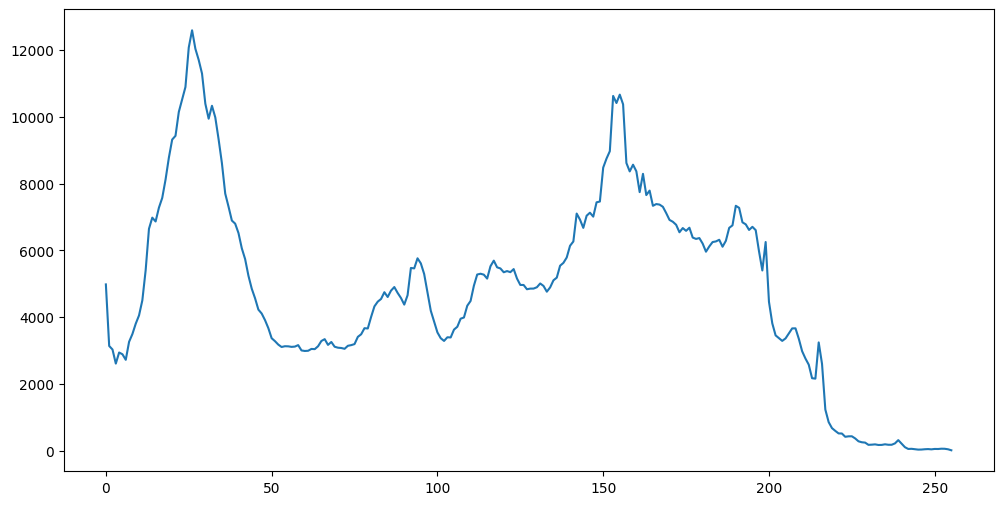

In [15]:
# algorithme pour calculer, dans un vecteur de taille 256, l'histogramme d'une image en niveaux de gris.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt # utile pour les graphiques

# Convertit l'image en niveaux de gris Y
image = cv.imread("thomas.png")
b,v,r = cv.split(image)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets

# Calcule l'histogramme de l'image
hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,image.shape[0]):      # énumère les lignes
    for j in range(0,image.shape[1]):  # énumère les colonnes
        hist[y[i,j]] = hist[y[i,j]] + 1


plt.figure(figsize=(12, 6))
#print(hist)
plt.plot(hist)
plt.show()

### Égalisez un histogramme

L’égalisation d’histogramme consiste à corriger une image qui manque de contraste : ses couleurs, ou ses niveaux de gris, se concentrent sur seulement quelques valeurs.
Cette transformation va faire une conversion de couleurs :

- Afin d’utiliser toute l’étendue des niveaux ;
- Afin d’avoir (à peu près) autant de pixels de chaque niveau.

L’astuce consiste à d’abord calculer l’histogramme cumulé (le principe est le même que pour l’histogramme, si ce n’est que pour toute valeur  i  on calcule non pas le nombre de pixels de cette valeur dans l’image, mais on cumule le nombre de pixels de valeur égale ou inférieure à  i  dans l’image).

#### Exemple 

Écrivez un algorithme mettant en œuvre le principe précédent pour égaliser l'histogramme d'une image en niveaux de gris, afin d'en améliorer le contraste.

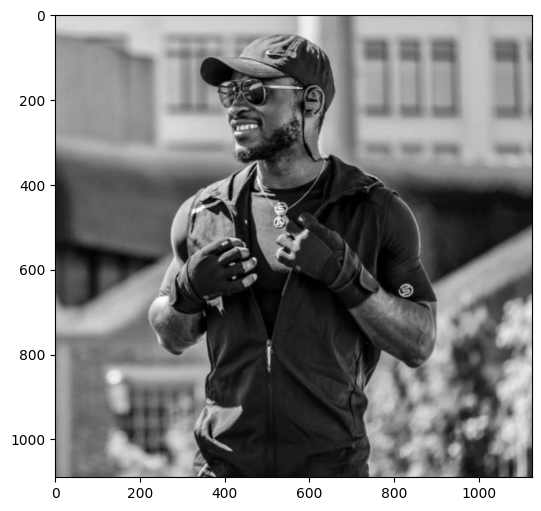

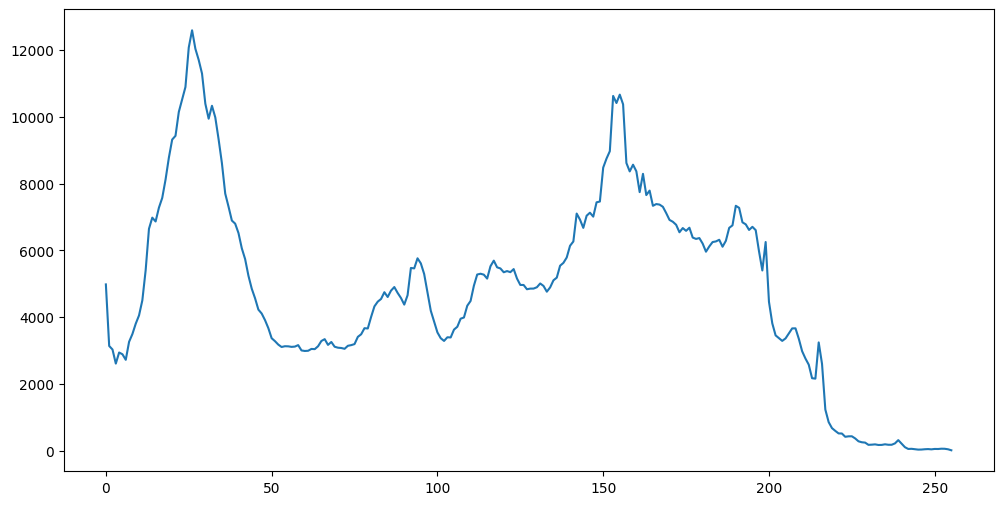

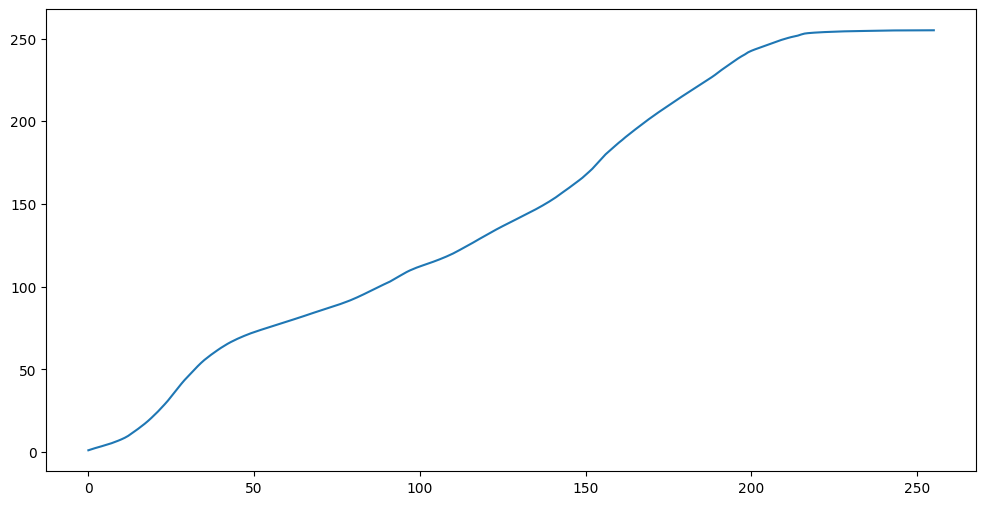

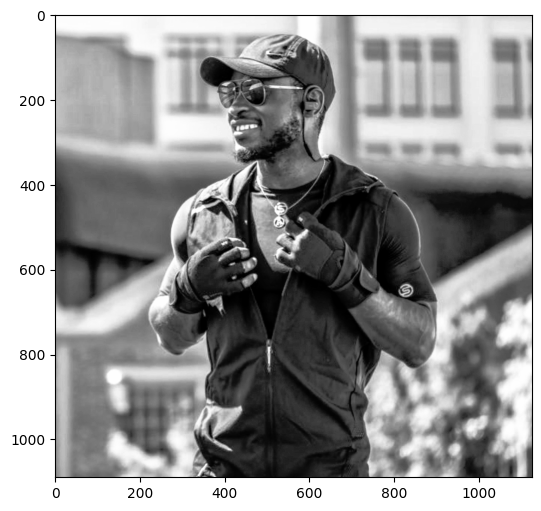

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Convertit l'image en niveaux de gris Y
image = cv.imread("thomas.png")
b,v,r = cv.split(image)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets
#cv.imshow("Luminance Y", y)
plt.figure(figsize=(12, 6))
plt.imshow(y, cmap='gray')


# Calcule l'histogramme de l'image
histo = np.zeros(256, int)      # prépare un vecteur de 256 zéros
for i in range(0,image.shape[0]):       # énumère les lignes
    for j in range(0,image.shape[1]):   # énumère les colonnes
        histo[y[i,j]] = histo[y[i,j]] + 1
#print(histo)
plt.figure(figsize=(12, 6))
plt.plot(histo)
plt.show()

# Calcule l'histogramme cumulé hc
hc = np.zeros(256, int)         # prépare un vecteur de 256 zéros
hc[0] = histo[0]
for i in range(1,256):
    hc[i] = histo[i] + hc[i-1]

# Normalise l'histogramme cumulé
nbpixels = y.size
hc = hc / nbpixels * 255
#print(hc)
plt.figure(figsize=(12, 6))
plt.plot(hc)
plt.show()

# Utilise hc comme table de conversion des niveaux de gris
for i in range(0,y.shape[0]):       # énumère les lignes
    for j in range(0,y.shape[1]):   # énumère les colonnes
        y[i,j] = hc[y[i,j]]
        
plt.figure(figsize=(12, 6))        
plt.imshow(y, cmap='gray')
#cv.imshow("Luminance Y après égalisation", y)
#cv.waitKey(0)
#cv.destroyAllWindows()

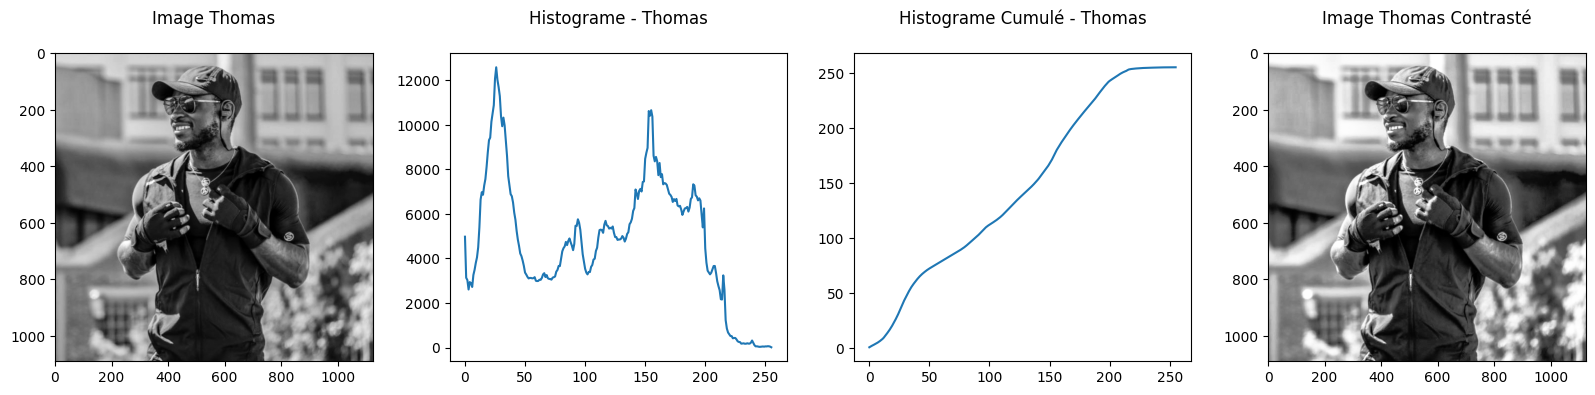

In [17]:
plt.figure(figsize=(20, 4))

## Imaage 1
    # Convertit l'image en niveaux de gris Y
image = cv.imread("thomas.png")
b,v,r = cv.split(image)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets
plt.subplot(1, 4, 1)
plt.imshow(y, cmap='gray')
plt.title("Image Thomas\n")

## Imaage 2
    # Calcule l'histogramme de l'image
histo = np.zeros(256, int)      # prépare un vecteur de 256 zéros
for i in range(0,image.shape[0]):       # énumère les lignes
    for j in range(0,image.shape[1]):   # énumère les colonnes
        histo[y[i,j]] = histo[y[i,j]] + 1
plt.subplot(1, 4, 2)
plt.plot(histo)
plt.title("Histograme - Thomas\n")

## Imaage 3
    # Calcule l'histogramme cumulé hc
hc = np.zeros(256, int)         # prépare un vecteur de 256 zéros
hc[0] = histo[0]
for i in range(1,256):
    hc[i] = histo[i] + hc[i-1]
# Normalise l'histogramme cumulé
nbpixels = y.size
hc = hc / nbpixels * 255
plt.subplot(1, 4, 3)
plt.plot(hc)
plt.title("Histograme Cumulé - Thomas\n")

## Imaage 4
    # Utilise hc comme table de conversion des niveaux de gris
for i in range(0,y.shape[0]):       # énumère les lignes
    for j in range(0,y.shape[1]):   # énumère les colonnes
        y[i,j] = hc[y[i,j]]
        
plt.subplot(1, 4, 4)       
plt.imshow(y, cmap='gray')
plt.title("Image Thomas Contrasté\n")

plt.show()

Dans le cas d’une image couleur, on pourrait penser répéter l’égalisation d’histogramme sur les 3 matrices des niveaux R, V et B individuellement. Cependant cette correction séparée va non seulement modifier le contraste final de la luminosité, mais peut aussi faire apparaître des couleurs qui n’existaient pas dans l’image originale (par exemple une zone avec uniquement des niveaux de gris pourra faire apparaître des couleurs, puisque R peut être corrigé différemment de V, lui-même différemment de B).

C’est pourquoi on préfère d’abord convertir l’image dans une représentation avec luminance et chrominance (par exemple YUV), puis effectuer l’égalisation uniquement sur la luminance Y.

### Cachez une image dans une autre

L’idée va être d’exploiter le fait qu’une modification d’un niveau (de gris, ou de n’importe quelle autre couleur) de seulement 1 unité n’est pas visible à l’œil.

Ainsi, nous pourrons remplacer arbitrairement le bit de poids faible (celui des unités) de chaque pixel de l’image originale par 1 bit du pixel correspondant à une autre image (qui sera donc binaire, monochrome) sans que cela n'affecte l’œil. Ainsi, le pixel résultat portera 2 informations :

- Une « approximation » du pixel original, au pire éloignée de 1 unité ;

- Le bit du pixel de l’image binaire à dissimuler.

Parmi les 3 plans RVB, on choisira ici de modifier les bits du plan B, puisque c’est plutôt dans cette gamme que notre œil est le moins sensible.

Shape Img Message: (512, 512, 3)
Shape Img Lenna: (440, 440, 3)


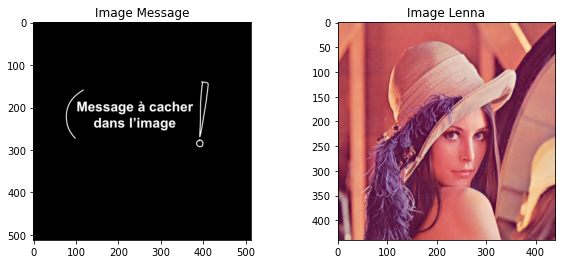

In [74]:
plt.figure(figsize=(10, 4))

message = cv.imread("message.png")
print("Shape Img Message:", message.shape)
plt.subplot(1, 2, 1)
plt.imshow(message, cmap="gray")
plt.title("Image Message")

plt.subplot(1, 2, 2)
image = cv.imread("Lenna.png")
print("Shape Img Lenna:", image.shape)
#plt.imshow(image)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Image Lenna")

plt.show()

### Algorithme d’encodage

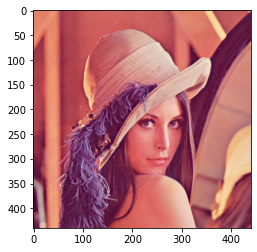

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Cache un message d'information (en Noir & Blanc) dans une image

image = cv.imread("Lenna.png")
message = cv.imread("message.png", 0)
message = cv.resize(message, (440, 440))


b,v,r = cv.split(image)        # récupère 3 matrices d'octets séparées
b = b & 0b11111110             # efface le bit de poids faible des octets de B
b = b | (message > 0)          # ajoute le bit de de poids faible en fonction du message

cache = cv.merge((b,v,r))      # reconstruit une image à partir des 3 plans RVB
cv.imwrite("cache.png", cache)

#cv.imshow("Image avec contenu caché", cache)
#cv.waitKey(0)
#cv.destroyAllWindows()

plt.figure(figsize=(10, 4))   
plt.imshow(cv.cvtColor(cache, cv.COLOR_BGR2RGB))     
#plt.imshow(cache, cmap="gray")

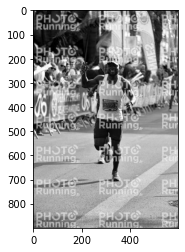

In [11]:
running = cv.imread("running.jpg")
b,v,r = cv.split(running) 

b = b & 0b11111110   
b = b | (b > 0) 

plt.figure(figsize=(10, 4))   
plt.imshow(cv.cvtColor(b, cv.COLOR_BGR2RGB))     

array([[85, 95, 89, ..., 71, 50, 26],
       [88, 95, 87, ..., 73, 57, 35],
       [87, 92, 83, ..., 65, 53, 35],
       ...,
       [93, 80, 66, ..., 74, 75, 63],
       [89, 76, 65, ..., 62, 80, 81],
       [80, 69, 63, ..., 52, 68, 70]], dtype=uint8)

### Agorithme de Décodage

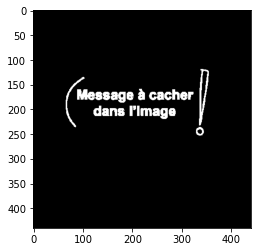

In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("cache.png")

# Extrait le contenu caché en bit de poids faible de la composante B
b,v,r = cv.split(image)         # récupère 3 matrices d'octets séparées
cache = b & 1                   # extrait le 1er bit (de poids faible)
cache = cache * 255             # multiplie par 255 pour visualiser du noir ou du blanc

#plt.imshow(cache)
plt.imshow(cv.cvtColor(cache, cv.COLOR_BGR2RGB)) 


Cette méthode de stéganographie (l’art de cacher une information dans une autre) est un peu simpliste et classique, et on imagine qu’un hacker voulant découvrir le message essayera sans doute d’afficher chacun des plans de bits de l’image et tomberait sur le fait que le 1er bit de la composante B affiche quelque chose de visuellement reconnaissable : c’est en effet directement l’image binaire du message.

# Découvrez les fréquences spatiales et la représentation spectrale

##### Théorème de convolution
La TFD (Transformé de Fourrier) du produit de convolution de 2 images est le produit scalaire des TFD, et vice versa

`im1*im2 ↔ IM1×IM2`

et inversement

`im1×im2 ↔ IM1∗IM2`


Cette propriété nous sera très utile pour le filtrage.

# Initiez-vous au filtrage en fréquence

Le filtrage en fréquence consiste à filtrer une image en modifiant son spectre :  on applique donc le filtrage dans le domaine fréquentiel.

Ceci permet de contrôler l’action réalisée sur chacune des fréquences de l’image. Ainsi, on peut décider d’atténuer les hautes fréquences ou au contraire de les amplifier. Nous verrons comment cela se traduit dans l’image.

https://openclassrooms.com/fr/courses/5060661-initiez-vous-aux-traitements-de-base-des-images-numeriques/5217241-initiez-vous-au-filtrage-en-frequence 

image.png

#### Principe du filtrage en fréquence

Le principe du filtrage en fréquence est le suivant (voir le schéma) :

- Le spectre IM de l'image à filtrer im est calculé par TFD-2D ;
- Le spectre IM obtenu est multiplié par une fonction de pondération H(u,v) , appelée fonction de transfert du filtre. On obtient ainsi le spectre filtré IM~ 
- Une TFD-2D inverse est appliquée sur  IM~ pour obtenir l'image filtrée im~.

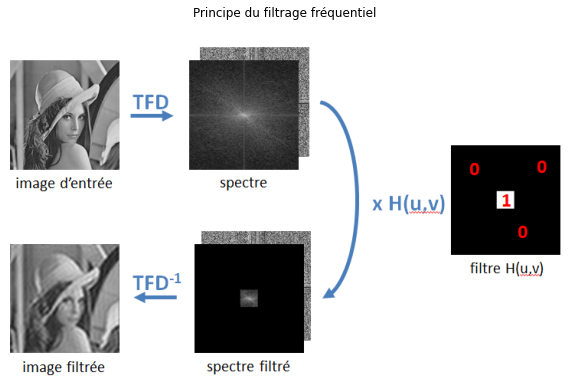

In [94]:
plt.figure(figsize=(10, 10))

image = cv.imread("principe-filtrage-frequentiel.png")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Principe du filtrage fréquentiel \n")
plt.show()


# Analysez le filtrage spatial et la convolution par masque

Lien cours : https://openclassrooms.com/fr/courses/5060661-initiez-vous-aux-traitements-de-base-des-images-numeriques/5217251-analysez-le-filtrage-spatial-et-la-convolution-par-masque

Comme en traitement du signal, le filtrage est un outil de base en traitement d'images.

On le retrouve par exemple dans les méthodes avancées de traitement d'image par apprentissage profond (Deep Learning  en anglais) qui sont utilisées typiquement pour des applications dans le domaine de l'intelligence artificielle, telles que la reconnaissance d'objets dans les images. En particulier, les réseaux de neurones convolutionnels s'appuient sur des filtres de convolution, appliqués sur l'image en très grand nombre et en cascade. En toute fin de ces cascades de filtres, on obtient la réponse à la question posée, par exemple  : « Quel est l'âge de cette personne ? » ou « Y a-t-il un ogre vert et un âne gris dans cette image ? ».

# Initiez-vous au domaine de la Morphologie Mathématique

In [95]:
ls

ImageProcessing/
Initiez-vous au traitement_de_bases_des_images_OCR.ipynb
Lenna.png
_dev_env/
_images/
cache.png
images/
message.png
principe-filtrage-frequentiel.png
resultat.jpg
smiley_nb.png
traitement_img.ipynb
ville.png


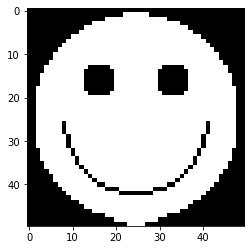

In [96]:
#Chargement d'une image N&B
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('smiley_nb.png',0)
plt.imshow(image, cmap='gray')
plt.show()

#### Activité n° 2 - Création d'éléments structurants

Objectif : appréhender la notion d'élément structurant


[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


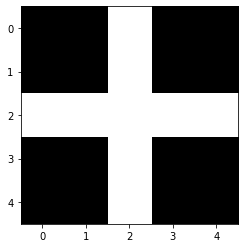

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0]]


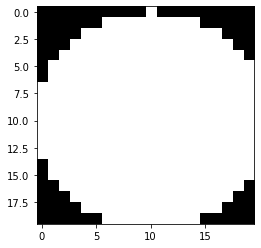

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


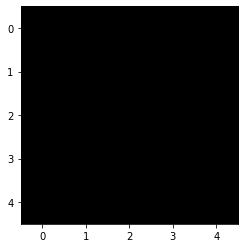

In [101]:
#Notion d'élément structurant
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

kernel_cross = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
print(kernel_cross)
plt.imshow(kernel_cross,cmap='gray')
plt.show()

kernel_circle = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
print(kernel_circle)
plt.figure()
plt.imshow(kernel_circle,cmap='gray')
plt.show()

kernel_rect = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
print(kernel_rect)
plt.figure()
plt.imshow(kernel_rect,cmap='gray')
plt.show()

L’intérêt de la morphologie mathématique est de nettoyer cette image bruitée afin d’obtenir une image beaucoup plus nette :

# Maîtrisez les opérations morphologiques de base

On distingue 2 types d’opérations morphologiques de base : l’**érosion** et la **dilatation** qui sont 2 techniques duales (dans la mesure où elles se complètent).

Ces 2 opérations permettent d’améliorer la qualité informationnelle d’une image numérique.




**L'Érosion** : Il s’agit d’un processus qui permet de séparer des objets qui sont collés. L’érosion réduit la taille des objets, ce qui peut être problématique pour certaines applications (en vision industrielle par exemple).

**La Dilatation** : Il s'agit d'un processus qui permet de réparer des traits interrompus.  Dans le cas des images en niveaux de gris, la dilatation correspondra à l’opérateur max.


#### Activité n° 3 - Érosion et dilatation

Nous allons d'abord définir un **algorithme générique de convolution**. Ce code permet de calculer la valeur de chaque pixel d'une nouvelle image via l'application d'une fonction prenant en paramètre l'image, les coordonnées du pixel à calculer et un filtre à appliquer à ce pixel-là.

In [102]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def convolution (image,filtre,function):
    new_image = np.zeros(image.shape,np.uint8)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            new_image[i,j] = function(image,i,j,filtre)
    return new_image

L'**opération de dilatation** correspond à une convolution particulière. Il nous faut donc coder la fonction correspondant à l'opération de dilatation sur un pixel donné. Comme indiqué auparavant, cette fonction revient à attribuer la valeur 1 à un pixel si au moins un pixel de son voisinage et son pixel correspondant dans l'élément structurant sont également égaux à 1

In [ ]:
def pixel_dilatation(image, ligne, colonne, elmt_structurant):
    width = elmt_structurant.shape[0] // 2
    height = elmt_structurant.shape[1] // 2
    pixel_value = False;
    for i in range(0,elmt_structurant.shape[0]):
        for j in range(0,elmt_structurant.shape[1]):
            x_image = ligne + i - width
            y_image = colonne + j - height
            if ((x_image >= 0) and (x_image < image.shape[0]) and
                (y_image>=0) and (y_image<image.shape[1])):
                if(... à compléter ...):
                    pixel_value = True
    return pixel_value

In [103]:
### Réponse :

def pixel_dilatation(image, ligne, colonne, elmt_structurant):
    width = elmt_structurant.shape[0] // 2
    height = elmt_structurant.shape[1] // 2
    pixel_value = False;
    for i in range(0,elmt_structurant.shape[0]):
        for j in range(0,elmt_structurant.shape[1]):
            x_image = ligne + i - width
            y_image = colonne + j - height
            if ((x_image >= 0) and (x_image < image.shape[0]) and
                (y_image>=0) and (y_image<image.shape[1])):
                if(image[x_image,y_image] and elmt_structurant[i,j]):
                    pixel_value = True
    return pixel_value

def dilatation(image, elmt_structurant):
    return convolution(image,elmt_structurant,pixel_dilatation)

La fonction de dilatation consiste ensuite à appliquer le filtre de convolution avec cette nouvelle fonction et un élément structurant

Procédez de même pour l'érosion. Complétez la fonction pixel_erosion:

Proposez un autre élément structurant afin de faire disparaître les yeux et la bouche après l'opération de dilatation.

In [ ]:
def pixel_erosion(image, ligne, colonne, elmt_structurant):
    width = elmt_structurant.shape[0] // 2
    height = elmt_structurant.shape[1] // 2
    pixel_value = True;
    for i in range(0,elmt_structurant.shape[0]):
        for j in range(0,elmt_structurant.shape[1]):
            x_image = ligne + i - width
            y_image = colonne + j - height
            if((x_image >= 0) and (x_image < image.shape[0]) and
               (y_image>=0) and (y_image<image.shape[1])):
                if(... à compléter ...):
                    pixel_value = False
    return pixel_value

In [107]:
def pixel_erosion(image, ligne, colonne, elmt_structurant):

    width = elmt_structurant.shape[0] // 2
    height = elmt_structurant.shape[1] // 2
    pixel_value = True;

    for i in range(0,elmt_structurant.shape[0]):
        for j in range(0,elmt_structurant.shape[1]):
            x_image = ligne + i - width
            y_image = colonne + j - height

            if((x_image >= 0) and (x_image < image.shape[0]) and (y_image>=0) and (y_image<image.shape[1])):
                if (elmt_structurant[i,j] and not(image[x_image,y_image])):
                    pixel_value = False

    return pixel_value

def erosion(image, elmt_structurant):
    return convolution(image,elmt_structurant,pixel_erosion)

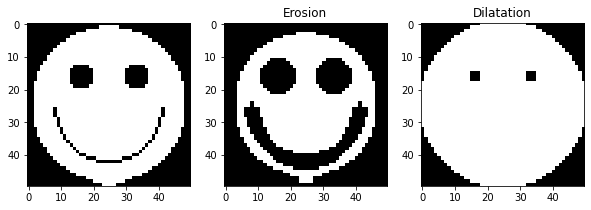

In [112]:
plt.figure(figsize=(10, 3))

image = cv.imread('smiley_nb.png',0)
plt.subplot(1, 3, 1)
plt.imshow(image,cmap='gray')

kernel_cross = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

plt.subplot(1, 3, 2)
plt.imshow(erosion(image,kernel_cross),cmap='gray')
plt.title("Erosion")

plt.subplot(1, 3, 3)
plt.imshow(dilatation(image,kernel_cross),cmap='gray')
plt.title("Dilatation")

plt.show()


# Concevez des opérations morphologiques de haut niveau

Les 2 principaux traitements qui découlent de la morphologie mathématique sont l’Ouverture et la Fermeture.

Ces 2 opérateurs aboutissent sur une implémentation du Gradient Morphologique qui consiste à extraire les contours d’une image binaire.

#### Activité n° 4 - Ouverture et fermeture

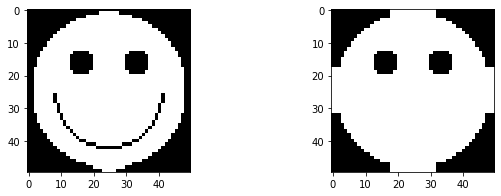

In [115]:
# Ouverture et fermeture
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

image = cv.imread('smiley_nb.png',0)
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')

#... Le code du chapitre précédent ...

kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
plt.subplot(1, 2, 2)
plt.imshow(erosion(dilatation(image,kernel),kernel),cmap='gray')


# Entraînez-vous en évaluant la déforestation en Amazonie

#### Préparation des images

1. Convertissez vos images en niveaux de gris. Nommez ces images ng_2000 et ng_2012.

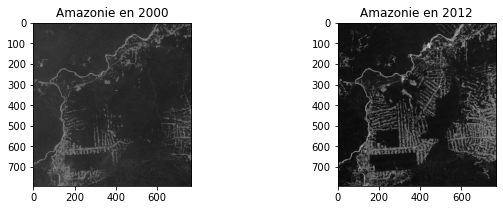

In [128]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_2000 = cv.imread('amazon_2000.png',0)
image_2012 = cv.imread('amazon_2012.png',0)

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.imshow(image_2000,cmap="gray")
plt.title('Amazonie en 2000')

plt.subplot(1, 2, 2)
plt.imshow(image_2012,cmap="gray")
plt.title('Amazonie en 2012')

plt.show()

2. Les images en niveaux de gris ne correspondent pas encore à des images binaires. Nous allons appliquer une méthode de binarisation afin de transformer nos images en niveaux de gris vers des images binaires. Nommez ces deux imagesbin_2000etbin_2012

In [125]:
blur = cv.GaussianBlur(image_2000,(5,5),0)
### La bonne fonction OpenCV pour binariser une image est cv.threshold avec param cv.THRESH_BINARY+cv.THRESH_OTSU

ret3,bin_2000 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur = cv.GaussianBlur(image_2012,(5,5),0)
ret3,bin_2012 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

3. Visualisez les images. Remarquez que les points identifiés comme déboisés sont discontinus et ne constituent pas des zones contiguës.

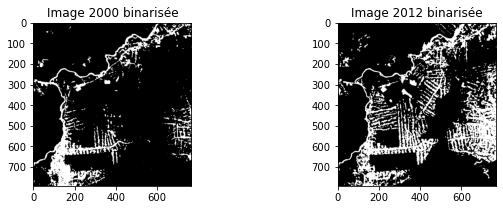

In [130]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.imshow(bin_image_2000,cmap="gray")
plt.title('Image 2000 binarisée')

plt.subplot(1, 2, 2)
plt.imshow(bin_image_2012,cmap="gray")
plt.title('Image 2012 binarisée')


plt.show()

#### Opérateurs de base

**Dilatation** : 
Une des opérations de base de la morphologie mathématique est la dilatation. Comme vu dans le cours, cet opérateur consiste à appliquer une convolution sur l'image par un élément structurant donné. Pour chaque pixel de l'image, l'élément structurant sera centré sur ce pixel. Les pixels de l'élément structurant forment alors un masque sur l'image. Le pixel de l'image résultante sera égal à 1 si au moins un de ces pixels du masque est égal à 1 dans l'image originale.

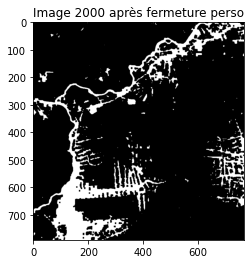

In [131]:
def fermeture(image,elmt_structurant):
    ### Attention à l'ordre des opérateurs erosion et dilatation ici !
    return erosion(dilatation(image,kernel),kernel)

#Tests des éléments structurants
kernel = np.ones((5,5))
area_2000 = fermeture(bin_image_2000, kernel)
plt.figure()
plt.imshow(area_2000, cmap="gray")
plt.title('Image 2000 après fermeture perso')
plt.show(block=False)

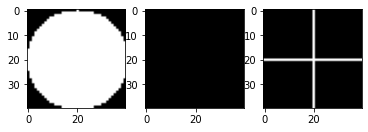

In [133]:
#Utilisation avec open CV
### La bonne fonction OpenCV pour créer un élément structurant est cv.getStructuringElement
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(40,40))
plt.figure()
plt.subplot(131)
plt.imshow(kernel,cmap='gray')

kernel = cv.getStructuringElement(cv.MORPH_RECT,(40,40))
plt.subplot(132)
plt.imshow(kernel,cmap='gray')

kernel = cv.getStructuringElement(cv.MORPH_CROSS,(40,40))
plt.subplot(133)
plt.imshow(kernel,cmap='gray')
plt.show(block=False)

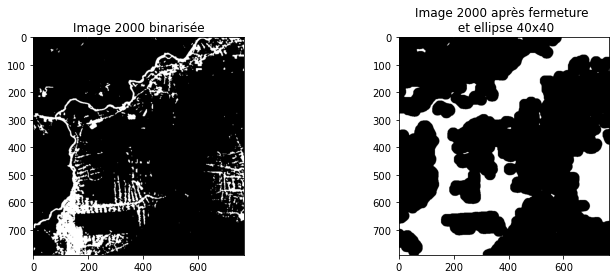

In [138]:

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(40,40))
### Le bon opérateur morphologique pour créer des zones déforestées homogènes est la fermeture
### La bonne fonction OpenCV pour réaliser une fermeture est cv.morphologyEx avec le paramètre cv.MORPH_CLOSE

area_2000 = cv.morphologyEx(bin_image_2000.astype(np.uint8), cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(bin_image_2000, cmap="gray")
plt.title('Image 2000 binarisée')

plt.subplot(122)
plt.imshow(area_2000, cmap="gray")
plt.title('Image 2000 après fermeture \n et ellipse 40x40')
plt.show(block=False)

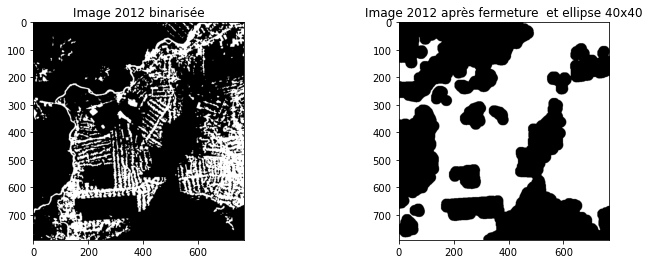

In [139]:
area_2012 = cv.morphologyEx(bin_image_2012.astype(np.uint8), cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(bin_image_2012, cmap="gray")
plt.title('Image 2012 binarisée')

plt.subplot(122)
plt.imshow(area_2012, cmap="gray")
plt.title('Image 2012 après fermeture  et ellipse 40x40')
plt.show(block=False)



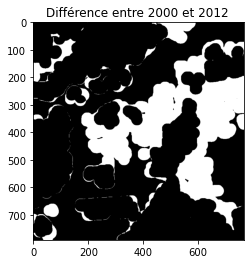

Pourcentage de zones déforestées en 2000 : 28.65.
Pourcentage de zones déforestées en 2012 : 51.40.


In [140]:

### Facultatif
diff = np.bitwise_xor(area_2000, area_2012)
plt.figure()
plt.imshow(diff, cmap="gray")
plt.title('Différence entre 2000 et 2012 ')
plt.show()

# Le calcul et affichage des informations demandées
total_couverture_2000 = np.sum(area_2000)/255.
total_couverture_2012 = np.sum(area_2012)/255.

print("Pourcentage de zones déforestées en 2000 : {0:.2f}.".format(total_couverture_2000/area_2000.size*100))
print("Pourcentage de zones déforestées en 2012 : {0:.2f}.".format(total_couverture_2012/area_2012.size*100))
